In [58]:
"""
Bike Sharing Dataset Analytics
Data :bike-sharing dataset by UCI machine learning repository
author:Akshit


"""


'\nBike Sharing Dataset Analytics\nData :bike-sharing dataset by UCI machine learning repository\nauthor:Akshit\n\n\n'

In [59]:
import warnings
warnings.simplefilter("ignore")

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [61]:
"""
Importing essential libraries (tensorflow)
"""
import tensorflow as tf
from tensorflow.keras import layers

In [62]:
!pip install skillsnetwork
import skillsnetwork
await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module1/L2/data/Bike-Sharing-Dataset.zip",overwrite=True)

  0%|          | 0/3 [00:00<?, ?it/s]

Saved to '.'


### Bike sharing dataset

We will be using the bike-sharing dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01). It contains the following features:

> - instant: record index
> - dteday : date
> - season : season (1:winter, 2:spring, 3:summer, 4:fall)
> - yr : year (0: 2011, 1:2012)
> - mnth : month ( 1 to 12)
> - hr : hour (0 to 23)
> - holiday : weather day is holiday or not (extracted from [Web Link](https://dchr.dc.gov/page/holiday-schedules?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01))
> - weekday : day of the week
> - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
> - weathersit :(1) Clear, Few clouds, Partly cloudy, Partly cloudy, (2) Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, (3) Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, (4) Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
> - temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39
> - atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
> hum: Normalized humidity. The values are divided to 100 (max)
> windspeed: Normalized wind speed. The values are divided to 67 (max)

> casual: count of casual users

> registered: count of registered users
> cnt: count of total rental bikes including both casual and registered


In [63]:
raw_data = pd.read_csv('day.csv')

In [64]:
"""
Lets clean the Data
"""
raw_data.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
40,41,2011-02-10,1,0,2,0,4,1,1,0.144348,0.149548,0.437391,0.221935,47,1491,1538
267,268,2011-09-25,4,0,9,0,0,0,2,0.634167,0.572637,0.845000,0.050379,1544,3466,5010
63,64,2011-03-05,1,0,3,0,6,0,2,0.384167,0.378779,0.789167,0.251871,640,1437,2077
268,269,2011-09-26,4,0,9,0,1,1,2,0.649167,0.589042,0.848333,0.110700,684,3946,4630
571,572,2012-07-25,3,1,7,0,3,1,1,0.724167,0.654054,0.450000,0.164800,1383,6790,8173


In [65]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [66]:
"""
Drop unnecesary Columns
dteday -> Not required
instant -> Id not required
registered & casual -> To prevent data lekage

"""
raw_data=raw_data.drop(columns=['dteday','instant','registered','casual'])

In [67]:
"""
Renaming columns
cnt-> total_rentals
mnth-> month
hum ->humidity
"""
raw_data.rename(columns={'cnt':'total_rentals','mnt':'month','hum':'humidity'},inplace=True)

In [68]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         731 non-null    int64  
 1   yr             731 non-null    int64  
 2   mnth           731 non-null    int64  
 3   holiday        731 non-null    int64  
 4   weekday        731 non-null    int64  
 5   workingday     731 non-null    int64  
 6   weathersit     731 non-null    int64  
 7   temp           731 non-null    float64
 8   atemp          731 non-null    float64
 9   humidity       731 non-null    float64
 10  windspeed      731 non-null    float64
 11  total_rentals  731 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.7 KB


In [69]:
df=raw_data

<Axes: ylabel='total_rentals'>

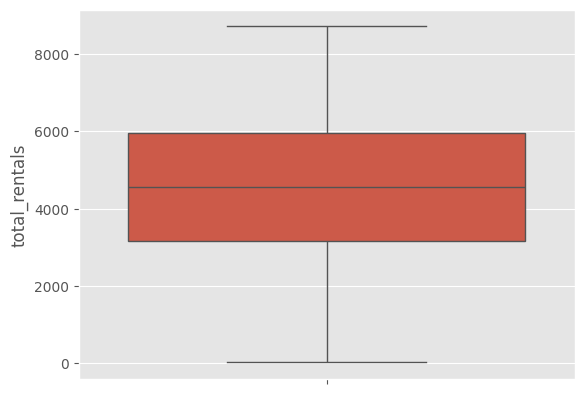

In [70]:
"""
Data Explorations

uni-variate analysis
"""
sns.boxplot(y='total_rentals',data=df)

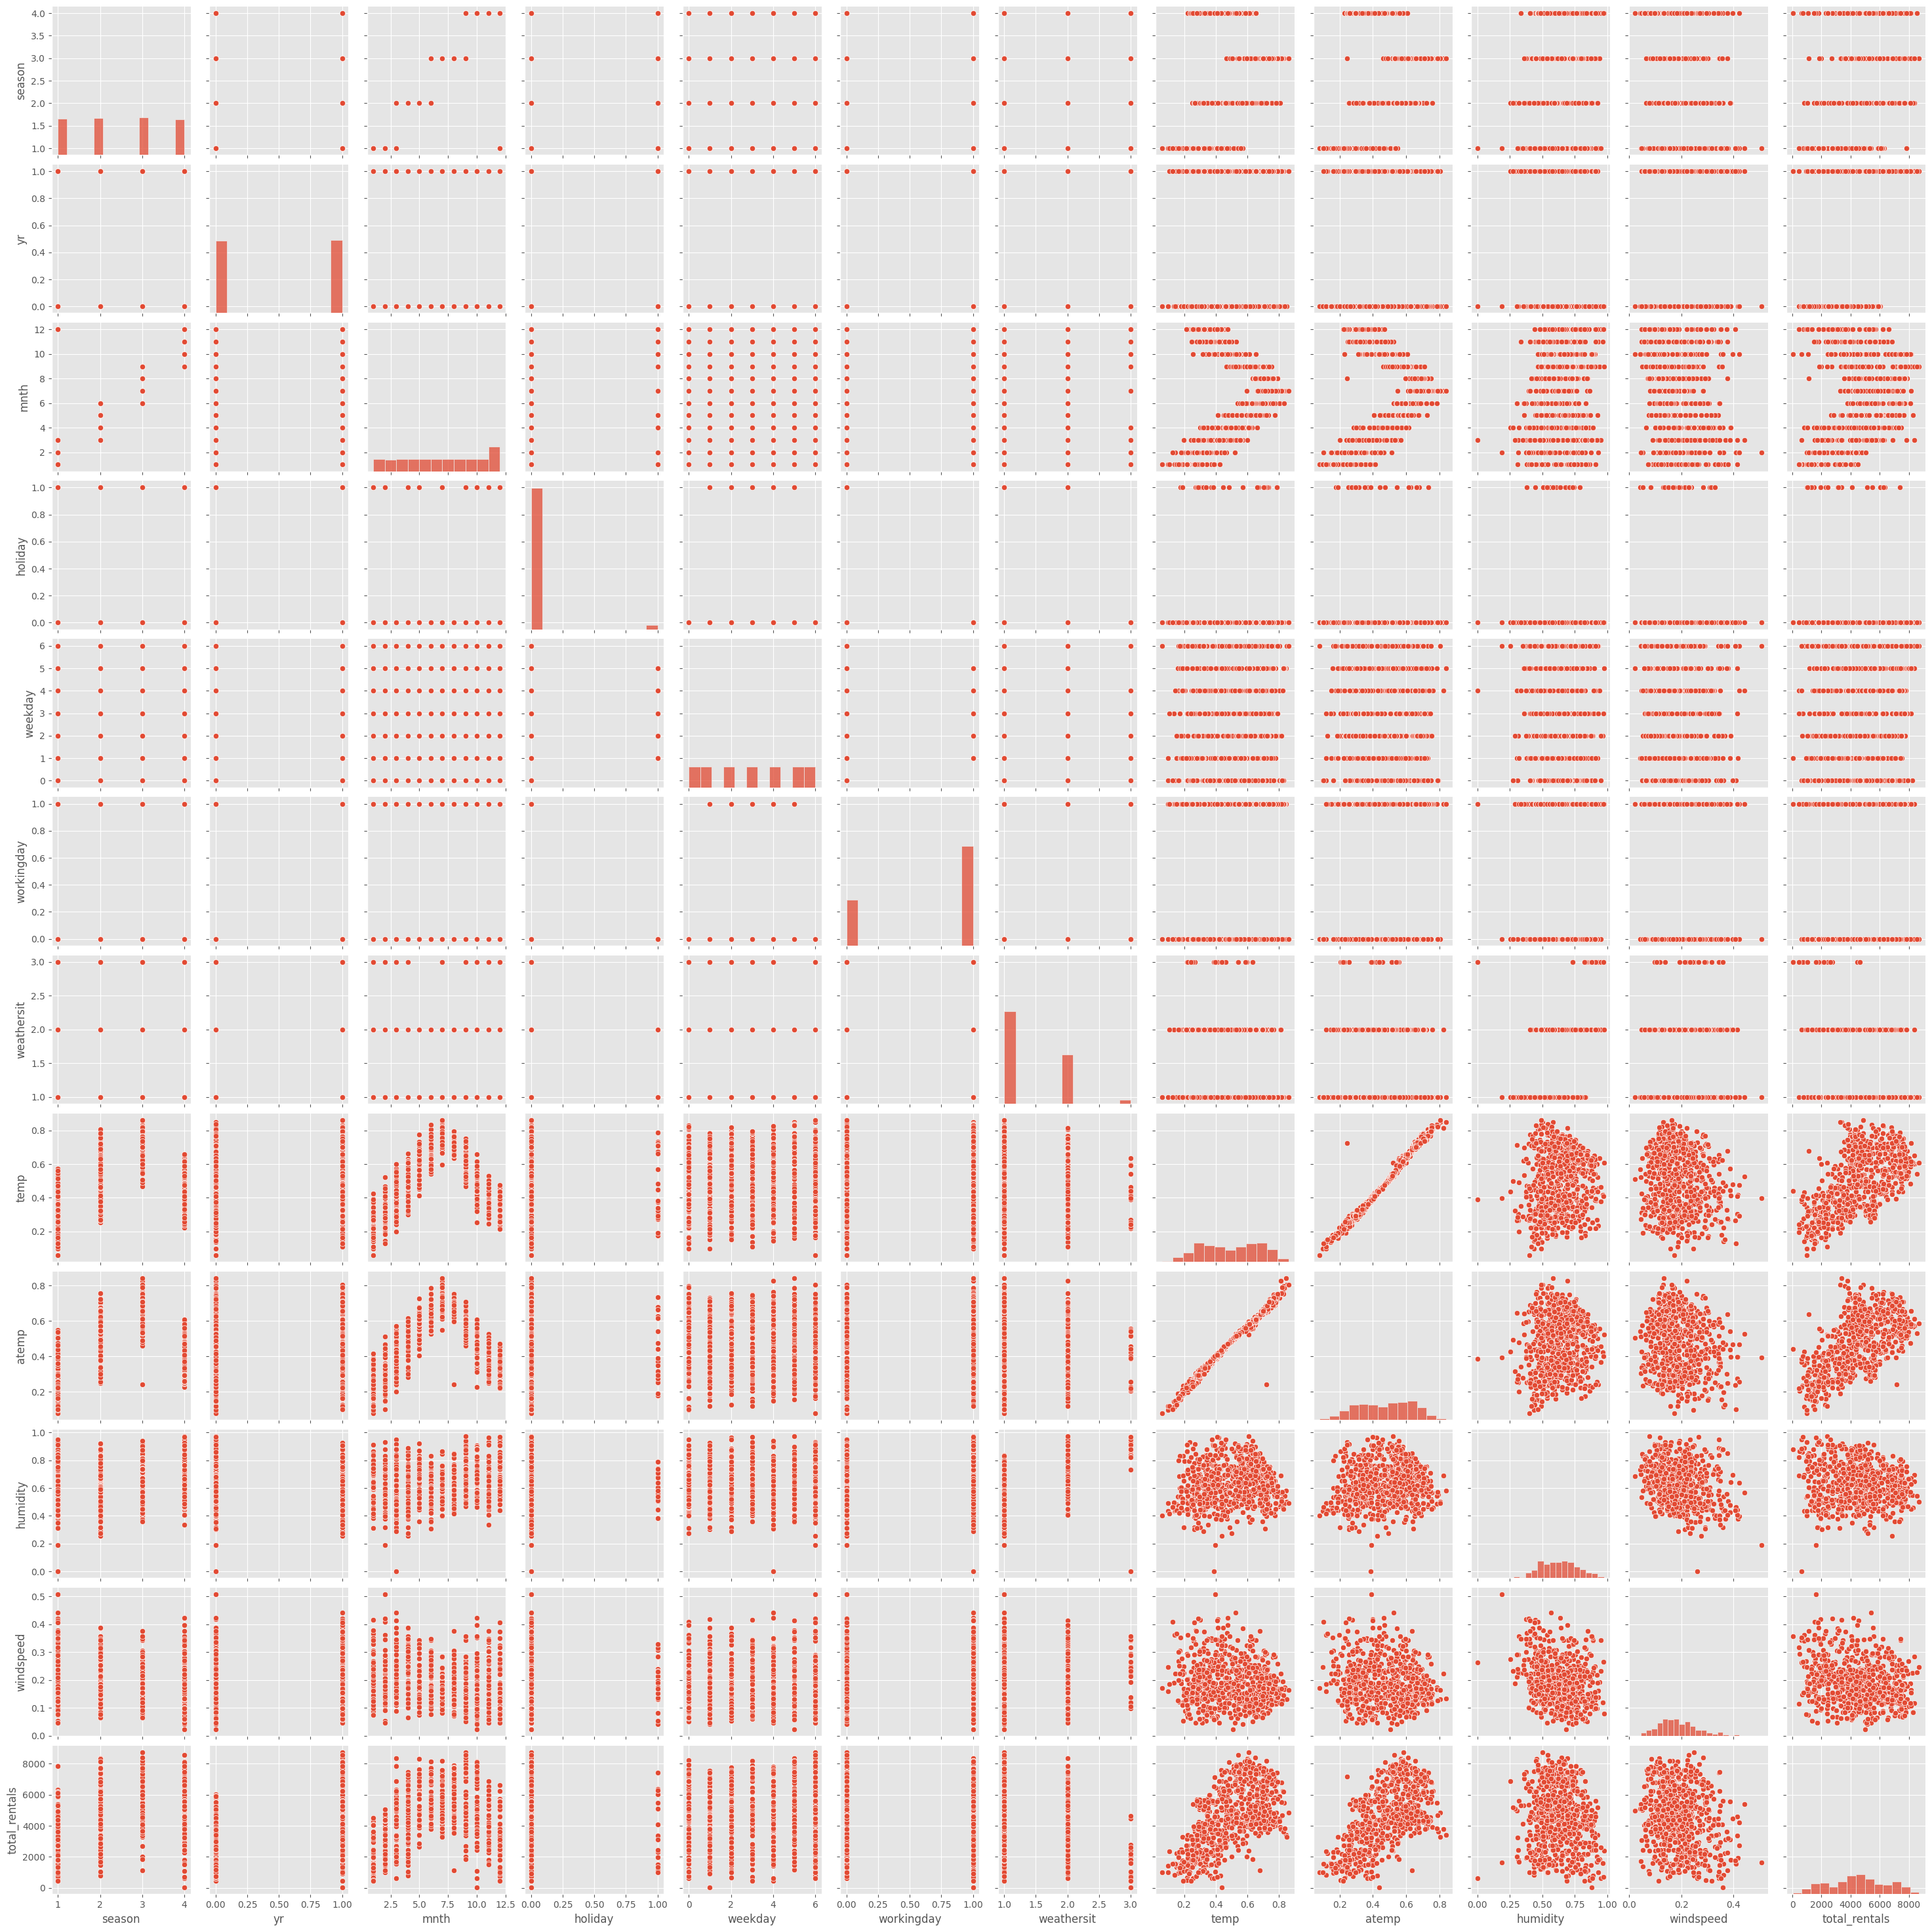

In [72]:
"""
Bi variate analysis
"""
sns.pairplot(data=df)

In [73]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,total_rentals
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


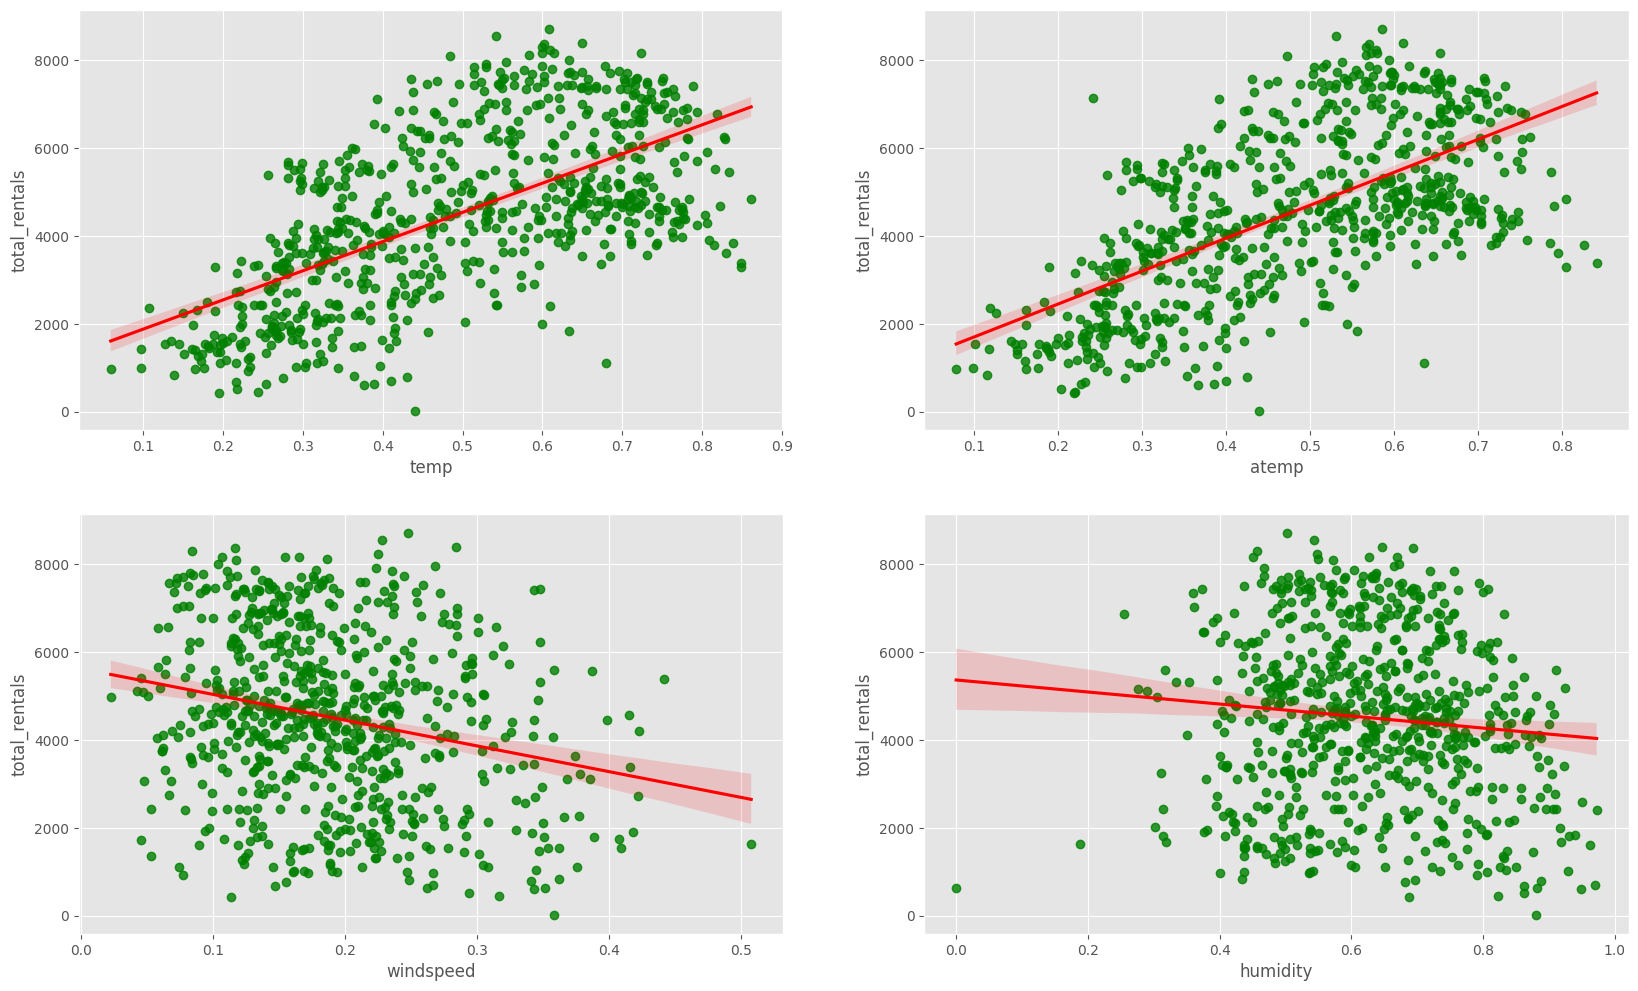

In [74]:
"""
ploting regression plot
"""
col=['temp','atemp','windspeed','humidity']
plt.figure(figsize=(20,12))
plt.style.use('ggplot')

for x in enumerate(col):
  plt.subplot(2,2,x[0]+1)
  sns.regplot(data=df,x=x[1],y='total_rentals',line_kws={"color":"red"}
              ,scatter_kws={"color":"green"})


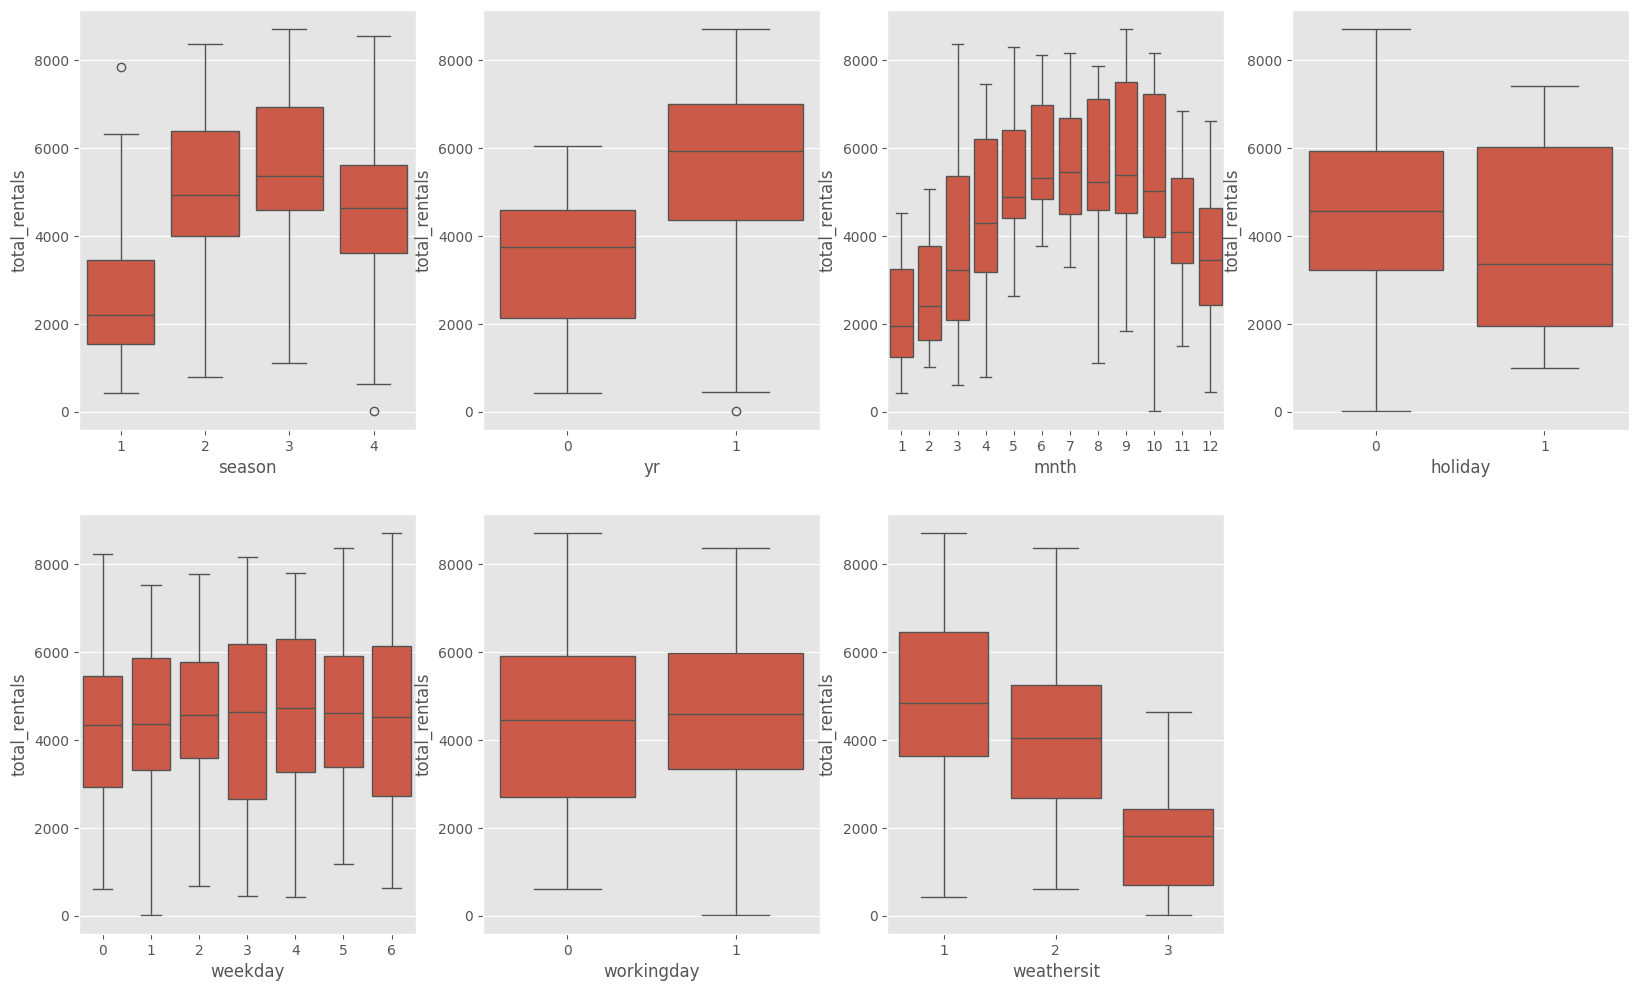

In [75]:
"""
So we can see there are positive correlation between temp and atemp with total_rentals.
and there is negative correlations between total_rentals and humidity, windspeed
"""

"""
Lets analysis the categorial data
"""
col=["season","yr","mnth","holiday","weekday","workingday","weathersit"]
plt.figure(figsize=(20,12))
for x in enumerate(col):
  plt.subplot(2,4,x[0]+1)
  sns.boxplot(data=df,x=x[1],y='total_rentals')





In [76]:
"""
The Demand for Bike rentals has highest median in fall while lowest in spring.
Stong growth in a year.
Rentals increase from jan-> peark around september
and falls after october
Non-holidays has high median
"""


'\nThe Demand for Bike rentals has highest median in fall while lowest in spring.\nStong growth in a year.\nRentals increase from jan-> peark around september\nand falls after october\nNon-holidays has high median\n'

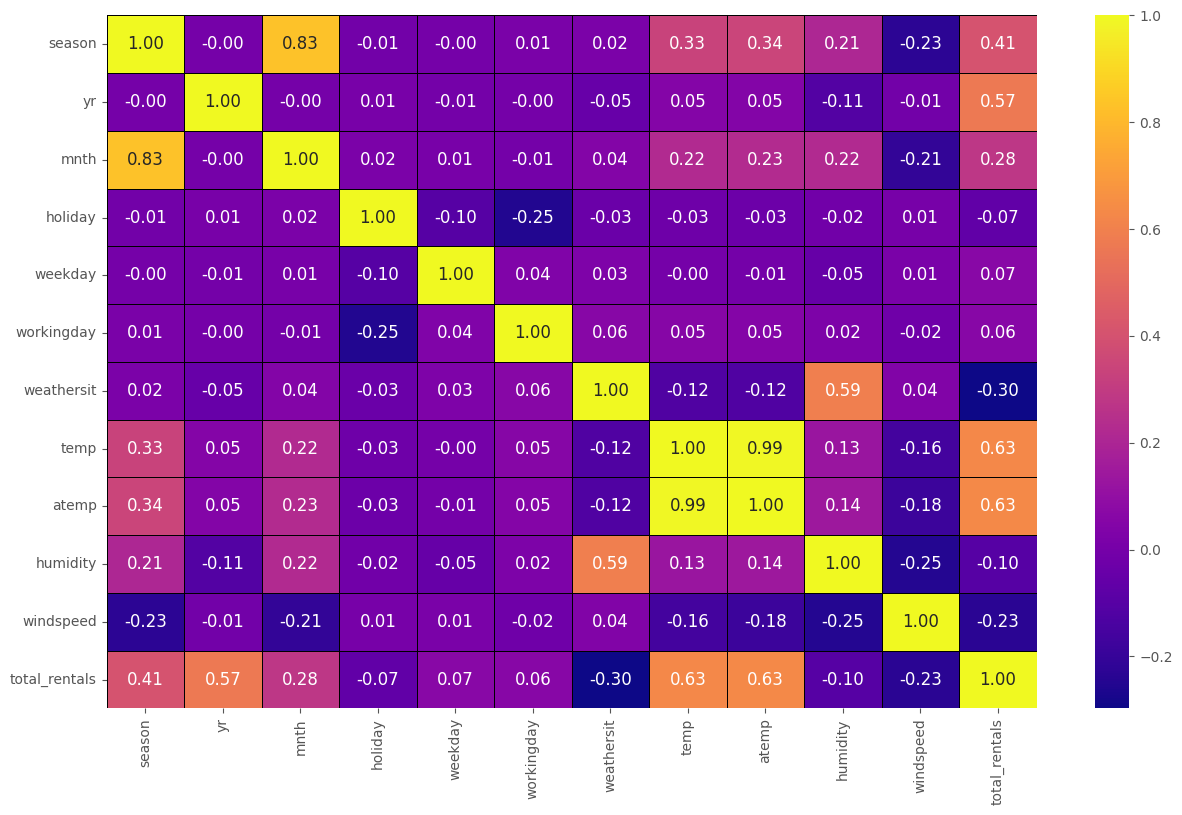

In [77]:
"""
Use Heatmaps for Correlations
"""
plt.figure(figsize=(15,9))
fig=sns.heatmap(
    data=df.corr(),
    cmap='plasma',
    annot=True,
    annot_kws={'fontsize':12},
    fmt='0.2f',
    linecolor='black',
    linewidths=0.6

)

In [78]:
"""
we can see temp and atemp is highly correlated
"""
df=df.drop(columns=['atemp'])

In [79]:
"""
Spliting the training and testing set
"""
x=df.drop(columns=['total_rentals'])
y=df['total_rentals']
X_train,X_test,y_train,y_test=train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
)
X_train

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,humidity,windspeed
682,4,1,11,0,2,1,2,0.343333,0.662917,0.342046
250,3,0,9,0,4,1,3,0.633913,0.939565,0.192748
336,4,0,12,0,6,0,1,0.299167,0.612917,0.095783
260,3,0,9,0,0,0,1,0.507500,0.695000,0.178483
543,3,1,6,0,3,1,1,0.697500,0.360000,0.271775
...,...,...,...,...,...,...,...,...,...,...
71,1,0,3,0,0,0,1,0.384348,0.527391,0.270604
106,2,0,4,0,0,0,1,0.456667,0.479583,0.303496
270,4,0,9,0,3,1,2,0.635000,0.848750,0.148629
435,1,1,3,0,0,0,1,0.361739,0.476957,0.222587


In [80]:
"""
Let's Create a linear Model
Normalized our data
"""
normalizer=tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

In [81]:
# print mean and variance
print(normalizer.mean.numpy())
print(normalizer.variance.numpy())

[[2.5        0.5171233  6.467466   0.02568493 2.9828768  0.66952056
  1.4023973  0.5001709  0.63118047 0.19068147]]
[[1.21575344e+00 2.49706790e-01 1.17386675e+01 2.50252150e-02
  4.09902191e+00 2.21262783e-01 3.02117527e-01 3.29049565e-02
  2.01770868e-02 5.98200271e-03]]


In [82]:
model=tf.keras.Sequential([normalizer,tf.keras.layers.Dense(units=1)])


In [162]:
df.columns.tolist()

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'humidity',
 'windspeed',
 'total_rentals']

In [178]:
"""
Comiple the model
"""
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.004),
              loss='mse',
              metrics=['mae'])


In [182]:
"""
Fitting the model
"""
run=model.fit(X_train,y_train,epochs=200,validation_split=0.2)

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 885760.9375 - mae: 705.9041 - val_loss: 653665.1875 - val_mae: 640.7885
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 742422.5000 - mae: 660.0253 - val_loss: 653616.7500 - val_mae: 640.7491
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 813974.9375 - mae: 669.0145 - val_loss: 653565.0625 - val_mae: 640.7051
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 822253.3125 - mae: 673.9088 - val_loss: 653532.1875 - val_mae: 640.6693
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 830499.3125 - mae: 673.0000 - val_loss: 653483.7500 - val_mae: 640.6392
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 819455.4375 - mae: 692.7232 - val_loss: 653439.0000 - val_mae: 640.5955
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 869109.4375 - mae: 689.6775 - val_loss: 653390.0625 - val_mae: 640.5581
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 851951.7500 - mae: 688

In [183]:
"""
Evalulate the result
"""
model.evaluate(X_test,y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 708603.5000 - mae: 629.2819 


[717139.8125, 639.9498291015625]

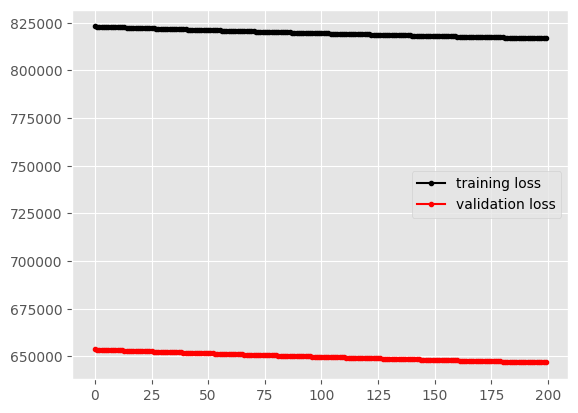

In [184]:
"""
lets plot loss
"""
fig,ax=plt.subplots()
ax.plot(run.history["loss"],'k',marker='.',label="training loss")
ax.plot(run.history["val_loss"],'r',marker='.',label="validation loss")
ax.legend()
plt.show()

In [187]:
"""
lets predict
"""
y_predict=model.predict(X_test)
y_predict=y_predict.flatten()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


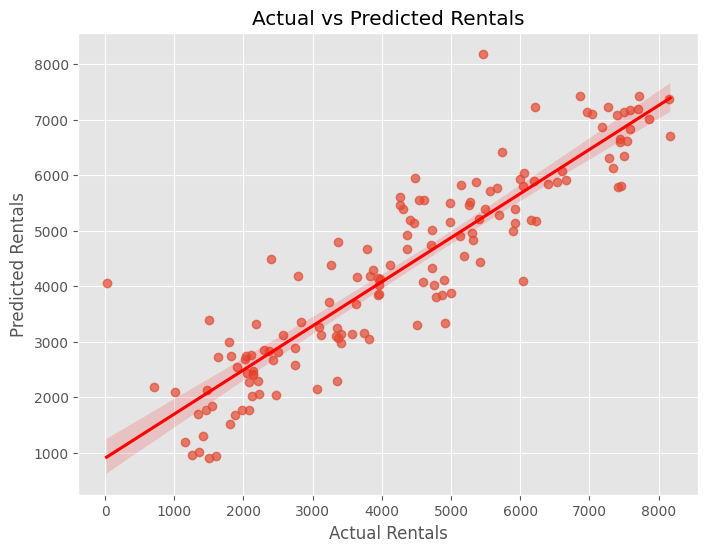

In [188]:
plt.figure(figsize=(8,6))
sns.regplot(x=y_test,y= y_predict,scatter_kws={'alpha':0.7},line_kws={'color':'red'})
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.title("Actual vs Predicted Rentals")
plt.show()